# Entendendo os Estudantes

Esse desafio proposto no Bootcamp Tech Minas tem como objetivo responder algumas perguntas através da análise de dados, aprofundando o conhecimento em frequência e medidas.

Os dados que deverão ser utilizado nesse script foram baixados do [kaggle](
https://www.kaggle.com/spscientist/students-performance-in-exams). Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas e suas informações pessoais.

**Variáveis:**

● gender - gênero do aluno<br>
● race/ethnicity - raça/etnia dos alunos<br>
● parental level of education - grau de escolaridade dos pais<br>
● lunch - tipo de almoço<br>
● test preparation course - indica se fez curso preparatório<br>
● math score - nota na prova de matematica<br>
● reading score - nota na prova de leitura<br>
● writing score - nota na prova de escrita<br>

# Bibliotecas

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise Exploratória

In [3]:
df = pd.read_csv("Data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

# Processamento de Dados

**1. Qual a quantidade de alunos em cada grupo racial/étnico ?**

In [12]:
df_race = df["race/ethnicity"].value_counts()
df_race

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

**2. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?**

In [13]:
df_male = df["gender"].loc[df["gender"]=='male'].value_counts()
print(f"A quantidade de pessoas do gênero masculino é: {df_male[0]}")

A quantidade de pessoas do gênero masculino é: 482


In [14]:
df_female = df["gender"].loc[df["gender"]=='female'].value_counts()
print(f"A quantidade de pessoas do gênero feminino é: {df_female[0]}")

A quantidade de pessoas do gênero feminino é: 518


**3. Analise as notas de matemática dos alunos de forma mais completa possível**

In [15]:
print(f'A média total das notas de matemática é: {round(df["math score"].mean(),2)}')
print(f'O desvio absoluto total das notas de matemática é: {round(df["math score"].mad(),2)}')
print(f'A variância total das notas de matemática é: {round(df["math score"].var(),2)}')
print(f'O desvio padrão total das notas de matemática é: {round(df["math score"].std(),2)}')

A média total das notas de matemática é: 66.09
O desvio absoluto total das notas de matemática é: 12.02
A variância total das notas de matemática é: 229.92
O desvio padrão total das notas de matemática é: 15.16


*Analisando as notas de matemática através de um recorte de gênero*

In [16]:
mean_male = df["math score"].loc[df["gender"]=='male'].mean()
mean_abs_male = df["math score"].loc[df["gender"]=='male'].mad()
var_male = df["math score"].loc[df["gender"]=='male'].var()
std_male = df["math score"].loc[df["gender"]=='male'].std()

print(f"A média das notas de matemática entre os homens é: {round(mean_male,2)}")
print(f"O desvio absoluto das notas de matemática entre os homens é: {round(mean_abs_male,2)}")
print(f"A variância das notas de matemática entre os homens é: {round(var_male,2)}")
print(f"O desvio padrão das notas de matemática entre os homens é: {round(std_male,2)}")

A média das notas de matemática entre os homens é: 68.73
O desvio absoluto das notas de matemática entre os homens é: 11.68
A variância das notas de matemática entre os homens é: 206.1
O desvio padrão das notas de matemática entre os homens é: 14.36


In [17]:
mean_female = df["math score"].loc[df["gender"]=='female'].mean()
mean_abs_female = df["math score"].loc[df["gender"]=='female'].mad()
var_female = df["math score"].loc[df["gender"]=='female'].var()
std_female = df["math score"].loc[df["gender"]=='female'].std()

print(f"A média das notas de matemática entre as mulheres é: {round(mean_female,2)}")
print(f"O desvio absoluto das notas de matemática entre as mulheres é: {round(mean_abs_female,2)}")
print(f"A variância das notas de matemática entre as mulheres é: {round(var_female,2)}")
print(f"O desvio padrão das notas de matemática entre as mulheres é: {round(std_female,2)}")

A média das notas de matemática entre as mulheres é: 63.63
O desvio absoluto das notas de matemática entre as mulheres é: 12.04
A variância das notas de matemática entre as mulheres é: 239.99
O desvio padrão das notas de matemática entre as mulheres é: 15.49


Observa-se que os homens possuem uma média maior (68.73) que as mulheres (63.63) e menor desvio padrão, ou seja, a amostra de dados masculina (14.36) possui uma variação menor do que a feminina (15.49)

*Analisando as notas através do maior e menor grau de escolaridade dos pais*

In [51]:
mean_master = df["math score"].loc[df["parental level of education"]=="master's degree"].mean()
std_master = df["math score"].loc[df["parental level of education"]=="master's degree"].std()

mean_some_highschool = df["math score"].loc[df["parental level of education"]=="some high school"].mean()
std_some_highschool = df["math score"].loc[df["parental level of education"]=="some high school"].std()

print(f"Média do alunos com pais com Mestrado: {round(mean_master,2)}")
print(f"Desvio Padrão do alunos com pais com Mestrado: {round(std_master,2)}\n")

print(f"Média do alunos com pais com algum nível de Ensino Médio: {round(mean_some_highschool,2)}")
print(f"Desvio Padrão do alunos com pais com algum nível de Ensino Médio: {round(std_some_highschool,2)}")

Média do alunos com pais com Mestrado: 69.75
Desvio Padrão do alunos com pais com Mestrado: 15.15

Média do alunos com pais com algum nível de Ensino Médio: 63.5
Desvio Padrão do alunos com pais com algum nível de Ensino Médio: 15.93


Observa-se que os alunos, cujos pais possuem um maior nível educacional, possuem uma média de notas de matemática maior (69.75) do que aqueles nos quais os pais têm o ensino médio incompleto. Entretanto, as notas apresentam apenas uma pequena diferença em sua dispersão, já que o desvio padrão dos alunos com pais com Mestrado é ligeiramente menor do que os com ensino médio incompleto.

# Visualização dos Dados

Analisando a distribuição dos dados

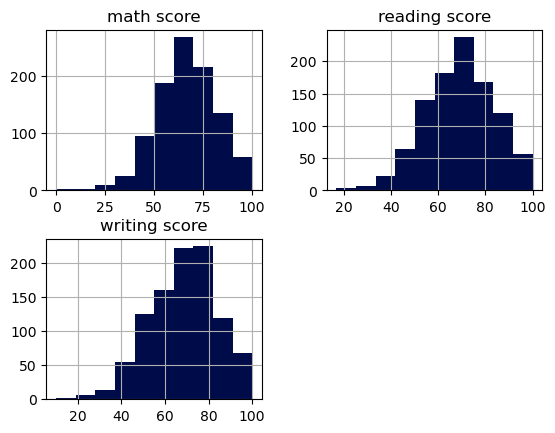

In [20]:
df.hist(column=["math score","reading score","writing score"], color= "#000B49")
plt.show()

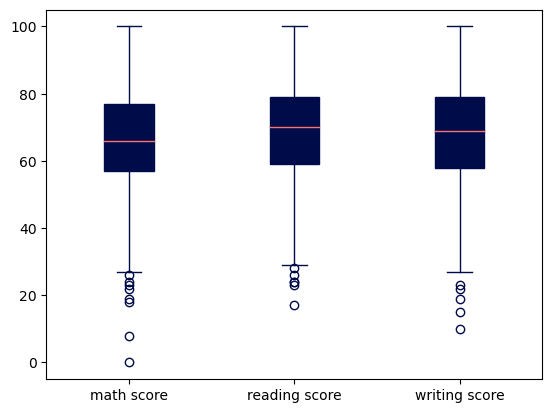

In [27]:
# plot (x,y)

bplot = plt.boxplot(x=[df["math score"], df["reading score"],df["writing score"]],
                   patch_artist=True, # ativa preenchimento com cor
                   boxprops=dict(facecolor="#000B49", color="#000B49"),
                    capprops=dict(color="#000B49"),
                    whiskerprops=dict(color="#000B49"),
                    flierprops=dict(markeredgecolor="#000B49"),
                    medianprops=dict(color="#FF7272"))

plt.xticks([1, 2,3], ["math score", "reading score","writing score"])
plt.show()

**4. Qual a nota média dos alunos segundo o grau de escolaridade dos pais?**

In [33]:
grade_grouped = df.groupby("parental level of education").mean()
grade_grouped

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


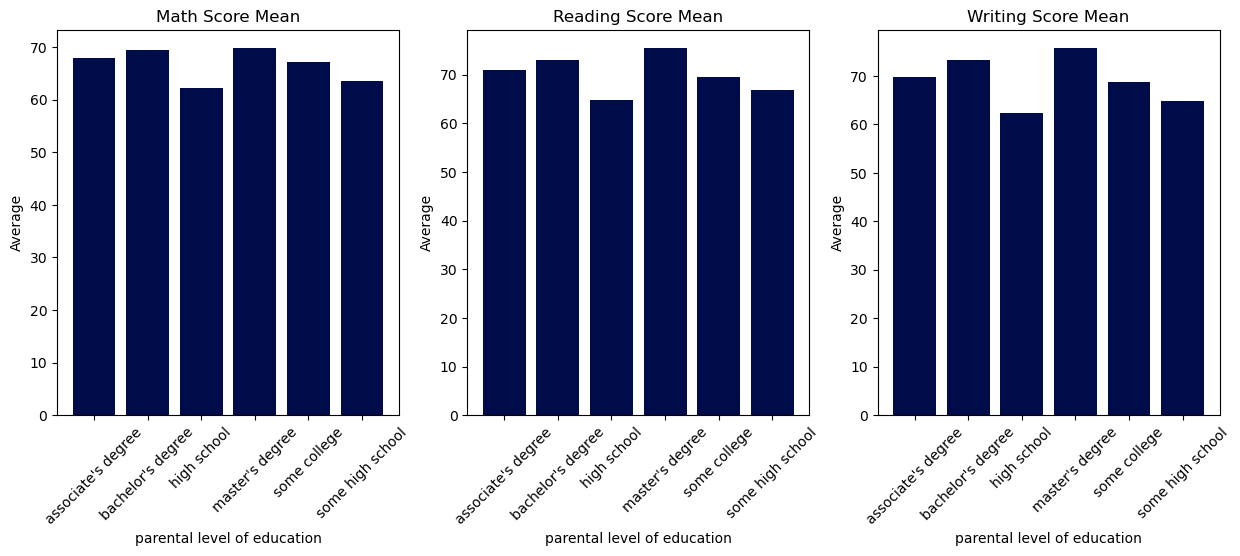

In [57]:
grade_grouped = df.groupby("parental level of education").mean()

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

axes[0].bar(grade_grouped.index,
             grade_grouped["math score"],
             color="#000B49")
axes[0].set(xlabel="parental level of education",
            ylabel="Average",
            title="Math Score Mean")

axes[0].set_xticks(ticks = grade_grouped.index,labels = grade_grouped.index, rotation = 45)

axes[1].bar(grade_grouped.index,
             grade_grouped["reading score"],
             color="#000B49")
axes[1].set(xlabel="parental level of education",
            ylabel="Average",
            title="Reading Score Mean")

axes[1].set_xticks(ticks = grade_grouped.index,labels = grade_grouped.index, rotation = 45)

axes[2].bar(grade_grouped.index,
             grade_grouped["writing score"],
             color="#000B49")
axes[2].set(xlabel="parental level of education",
            ylabel="Average",
            title="Writing Score Mean")

axes[2].set_xticks(ticks = grade_grouped.index,labels = grade_grouped.index, rotation = 45)


plt.show()

**5. Verifique gráficamente a relação da nota de leitura e de escrita.**

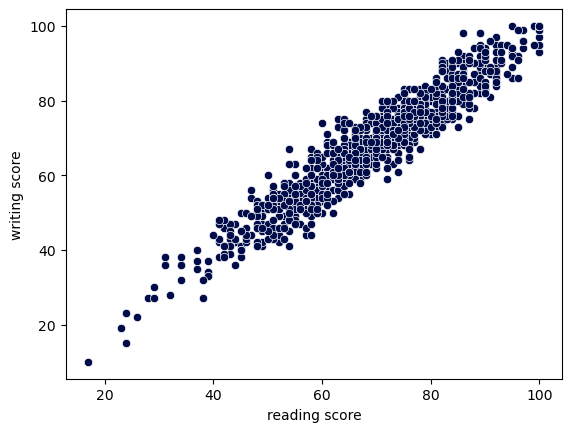

In [65]:
sns.scatterplot(data=df, x="reading score", y="writing score", color = "#000B49")
plt.show()

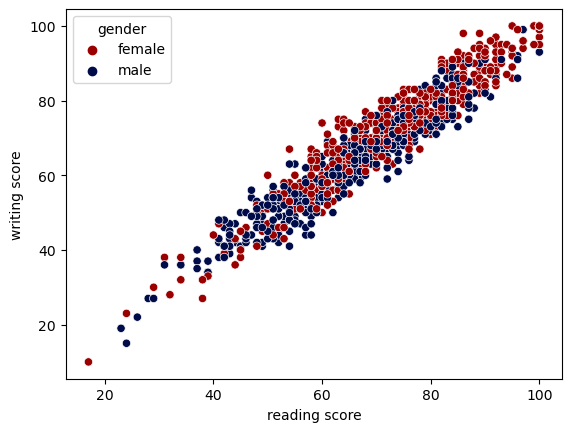

In [68]:
sns.scatterplot(data=df, x="reading score", y="writing score", hue = "gender", palette = ["#9B0000","#000B49"])
plt.show()

A relação entre as notas das provas de escrita e leitura são crescentes e pode-se observar que as mulheres têm notas mais altas que os homens.